# Tutorial 4 - Introduction to Scientific Computation in Julia


In this tutorial, we will see some examples of simple Scientific Computation problems and how they can be solved using Julia.


## Exercise 1 - Taylor expansion approximation of Euler's number


Let's try to approximate the Euler's number ('$e$') using the Taylor's expansion of the exponential function.  
This number is also known as Napier's number or Nepero's number.
$$f(x)=e^{x}$$
Let's recall the definition of the Taylor's series expansion:
$$f(x)=\sum_{i=0}^{+\infty} \frac{f^{(i)}(x_{0})}{i!}(x-x_{0})^{i}$$

We can easily compute the Taylor expansion around 0, since we know the results of "$f(0)$" without using the Euler's number:
$$f(x)=\sum_{i=0}^{+\infty} \frac{f^{(i)}(0)}{i!}x^{i}=\sum_{i=0}^{+\infty} \frac{1}{i!}x^{i}$$

Since we want to use this formula to estimate Euler's number, we have to evaluate the function around "$x=1$":
$$f(1)=\sum_{i=0}^{+\infty} \frac{1}{i!}=e$$


### Question 1

**Q1**: Using the default function "`exp`", what is the maximum precision of the Euler's number for Float64? And what about Float32 and Float16?


In [6]:
# Float64
e64 = exp(1.0);
println("The Euler's number in Float64 is ",string(e64));
println("The machine precision for Euler's number in Float64 is ",string(eps(e64)),"\n")

# Float32
e32 = exp(Float32(1.0));
println("The Euler's number in Float32 is ",string(e32));
println("The machine precision for Euler's number in Float32 is ",string(eps(e32)),"\n")

# Float16
e16 = exp(Float16(1.0));
println("The Euler's number in Float16 is ",string(e16));
println("The machine precision for Euler's number in Float16 is ",string(eps(e16)),"\n")

The Euler's number in Float64 is 2.718281828459045
The machine precision for Euler's number in Float64 is 4.440892098500626e-16

The Euler's number in Float32 is 2.7182817
The machine precision for Euler's number in Float32 is 2.3841858e-7

The Euler's number in Float16 is 2.719
The machine precision for Euler's number in Float16 is 0.001953



### Question 2

**Q2**: Create a function that computes the sum of the first _n_ terms of this series.  
What is the computational time required?


In [8]:
function EulerSeries(n::Int)
    e = 0.0;
    for i = 0:n
        e += 1/factorial(i);
    end
    return e;
end

n = 20;
e = EulerSeries(n);
println("The Euler's number extimation with the first ", string(n), " terms is: ", string(e))

The Euler's number extimation with the first 20 terms is: 2.7182818284590455


We can now compare their computational time to find out which is more efficient.  
There are multiple ways to obtain the time required to execute a command in Julia:

- "`@time()`": prints in the terminal the time required to execute the command between brackets.
- "`@timev()`": same as the "`@time`", but verbose. It prints more information.
- "`@elapsed()`": returns the time elapsed as a variable. Useful to compute the Max elapsed time, Min elapsed time and average elapsed time.


In [10]:
@time(EulerSeries(n));

  0.000001 seconds


In [11]:
@timev(EulerSeries(n));

  0.000000 seconds
elapsed time (ns):  459.0
gc time (ns):       0
bytes allocated:    0
pool allocs:        0
non-pool GC allocs: 0
minor collections:  0
full collections:   0


As you can see from running the previous cell, each run returns a different elapsed time for the same exact function. The elapsed time dipends on the other processes running in your computer at the time of the call.  
For this reason, it's always best to run the code multiple time and return the average running time, using the "`@elapsed`" function:


In [13]:
timeLoop = 0.0;
for i = 1:10
    timeLoop += @elapsed(EulerSeries(n));
    sleep(1)
end
println("The average execution time for EulerSeries function is: ",string(timeLoop/10), " seconds.");

The average execution time for EulerSeries function is: 3.3083999999999995e-6 seconds.


**Try at home:** Can you write this function for Float32 and Float16? Does the efficiency change with the other two datatypes?


### Question 3

**Q3**: Considering the Euler's number approximation using Taylor's series, how many terms of the series do we need to compute to reach a precision lower than the machine epsilon?


Using the command "`eps`", we know that the maximum machine precision for Float64 around e is approx 4.441e-16.  
Intuitively, any element of the series that is below this value, will not increase the sum. Experimentally, we can compute the following:
$$\frac{1}{17!}\approx 2.811\cdot 10^{-15} > \texttt{eps}(e)$$
$$\frac{1}{18!}\approx 1.562\cdot 10^{-16} < \texttt{eps}(e)$$
Therefore, we could reasonably guess that any term with i > 17 is not actually improving our estimate.
Let's confirm our assumption using Julia.


In [17]:
diff1 = abs(EulerSeries(17)-EulerSeries(16));
diff2 = abs(EulerSeries(18)-EulerSeries(17));

println("The difference between the Euler's number estimate using respectively\n\tthe first 16 and 17 terms of the series is ", string(diff1))
println("The difference between the Euler's number estimate using respectively\n\tthe first 17 and 18 terms of the series is ", string(diff2))

The difference between the Euler's number estimate using respectively
	the first 16 and 17 terms of the series is 2.6645352591003757e-15
The difference between the Euler's number estimate using respectively
	the first 17 and 18 terms of the series is 0.0


Our hypothesys was confirmed: each term of the series after the 18th, does not improve our estimate.  
Please note the value of "`diff1`": in theory this should be equal to the 1/17!, but in practice this number is sightly different. This is due to the machine precision around _e_ that approximates the 18th element of the series.  
**Try at home**: How many terms of the series are necessary to fully express the Euler's number using Float16 and Float32?


### Question 4

**Q4**: How many terms of the series are necessary to obtain an arbitrary precision?
For example, how many terms of the series do I need to find the Euler's number with 6 significant digits?


We can compute this result analytically by using the Lagrangian form of the remainder for the n-th term of the series:
$$R_{n}(x) = \frac{f^{(n)}(t)}{n!}(x-x_{0})^{n} \qquad\text{for some}~t\in[x_{0},x]$$

In our case this becomes the following:
$$R_{n}(1) = \frac{e^{t}}{n!}(1-0)^{n} = \frac{e^{t}}{n!} \qquad\text{for some}~t\in[0,1]$$

Since the exponential function is a monotonically increasing function, the upper limit of the error will be for _t = 1_. The maximum error function for the n-th term becomes:
$$err(n) \leq \frac{e}{n!}$$

Since we want to find the first 6 significant digits, we need to have an error below 10^-5.
$$err(n^{*}) < 10^{-5}$$
$$\frac{e}{n^{*}!} < 10^{-5}$$
$$n^{*}! > \frac{e}{10^{-5}}$$


In [21]:
limit = exp(1)/1e-5;

ii = 0;
while factorial(ii) < limit
    ii += 1;
end

println("To find the first 6 digits of the Euler's number, you need at least the first ", string(ii), " elements of the series.\n")
println("Euler's number with ", string(ii-1), " elements:\t", string(EulerSeries(ii-1)))
println("Euler's number with ", string(ii), " elements:\t", string(EulerSeries(ii)))
println("Ground-truth value:\t\t", string(exp(1.0)))

To find the first 6 digits of the Euler's number, you need at least the first 9 elements of the series.

Euler's number with 8 elements:	2.71827876984127
Euler's number with 9 elements:	2.7182815255731922
Ground-truth value:		2.718281828459045


## Exercise 2 - Cancellation error


Let's consider the two equivalent functions below:
$$f(x) = (x-3)^{5}$$
$$g(x) = x^{5}-15x^{4}+90x^{3}-270x^{2}+405x-243$$

These two functions are analytically equivalent, but is it true also for computational purposes?  
For which values of $x$ in the range $[0,5]$ the difference is maximum?


Due to _Cancellation errors_, performing several differences between terms with similar orders of magnitude can lower the accuracy.  
The maximum relative error will occur for $x \approx 3$.


In [25]:
import Plots;
f(x) = (x-3)^5;
g(x) = x^5-15x^4+90x^3-270x^2+405x-243;

x = 1:1e-3:5;
y1 = f.(x);
y2 = g.(x);

absErr = abs.(y1-y2);
relErr = abs.((y1-y2) ./ y1);

To plot in logarithmic scale, we need to remove the zeroes from the errors.
One solution is to convert the zeroes into NaN, since the plot function skips that points.


In [27]:
replace!(absErr, 0.0 => NaN);
replace!(relErr, 0.0 => NaN);

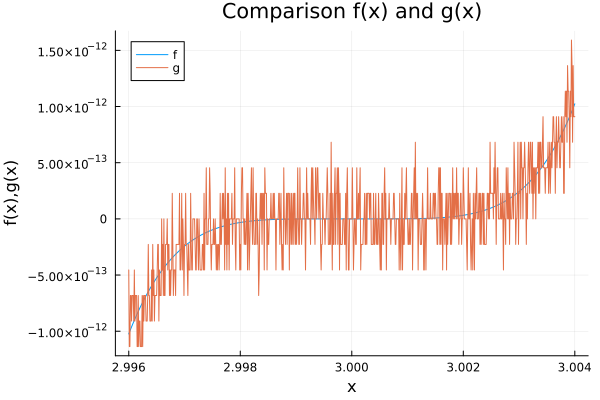

In [28]:
x_zero = 2.996:1e-5:3.004;

Plots.plot(x_zero,[f.(x_zero) g.(x_zero)],title="Comparison f(x) and g(x)",label=["f" "g"],xlabel="x",ylabel="f(x),g(x)")

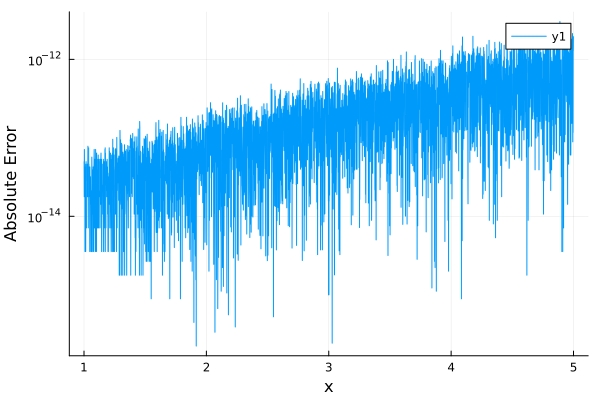

In [29]:
Plots.plot(x,absErr,yscale=:log10,xlabel="x",ylabel="Absolute Error")

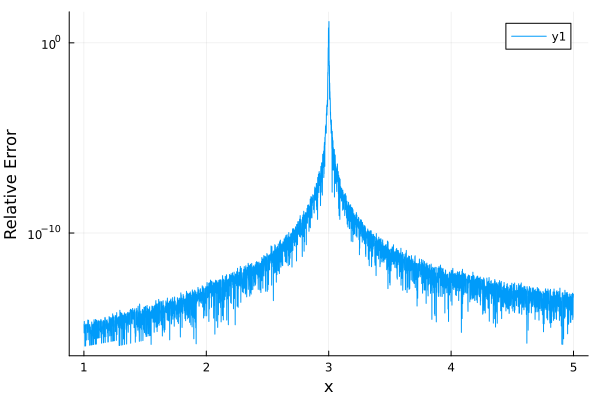

In [30]:
Plots.plot(x,relErr,yscale=:log10,xlabel="x",ylabel="Relative Error")

## Exercise 3 - Solving linear systems

### Question 1

**Q1**: Solve the following system of linear equations using Julia:

$$
\begin{cases}
2x+4y-2z = 6\\
x+3y+4z = -1\\
5x+2y = 2
\end{cases}
$$

$$
\begin{bmatrix}
    2   & 4   & -2\\
    1   & 3   & 4\\
    5   & 2   & 0
\end{bmatrix}
\begin{bmatrix}
    x\\
    y\\
    z
\end{bmatrix}
=
\begin{bmatrix}
    6\\
    -1\\
    2
\end{bmatrix}
$$


The first step is checking that the corresponding matrix has rank 3, otherwise the system cannot be solved:


In [33]:
import LinearAlgebra;

A = [2 4 -2; 1 3 4; 5 2 0];
b = [6; -1; 2];

println("The rank of matrix A is ",string(LinearAlgebra.rank(A)))

The rank of matrix A is 3


We can now solve the system using the "`\`" operator.


In [35]:
x = A \ b;
println("The solution of the linear equation A*x = b is: ", string(x))

The solution of the linear equation A*x = b is: [0.0, 1.0, -1.0]


### Question 2

LU factorization splits a matrix M into a lower triangular matrix L and an upper-triangular matrix U, such that:
$$M=L\cdot U$$
**Q2**: Let's consider the LU factorization of the matrix A. Does the factorization introduce error?  
**Note**: This can be obtained using the "`LinearAlgebra.lu`" function.


In [37]:
Fact = LinearAlgebra.lu(A,LinearAlgebra.NoPivot(););
L = Fact.L

3×3 Matrix{Float64}:
 1.0   0.0  0.0
 0.5   1.0  0.0
 2.5  -8.0  1.0

In [38]:
U = Fact.U

3×3 Matrix{Float64}:
 2.0  4.0  -2.0
 0.0  1.0   5.0
 0.0  0.0  45.0

In [39]:
err = maximum(abs.(L*U-A))

0.0

In this specific case, the LU decomposition does not introduce an error greater than the machine precision. But is it true also in general?


### Question 3

**Q3**: Generate a 100x100 random symmetric matrix and compute its LU decomposition. Does this decomposition introduce errors?


In [42]:
import Random
Random.seed!(0)
M = Random.randn((100,100));
L,U = LinearAlgebra.lu(M,LinearAlgebra.NoPivot(););
err = maximum(abs.(L*U-M));

println("The maximum error introduced by LU factorization is: ", err)

The maximum error introduced by LU factorization is: 2.538191878898033e-12
